In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyecharts
import re,urllib3,time,csv,datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.finance as mpf
import matplotlib.dates as mpd

%matplotlib inline

In [58]:
data_loc = "C:/Users/workspace/SH_tongliang/database/bitmex_1min/bitmex_1min/"
example_bchz18 = pd.read_csv(data_loc + "ethz18_1m.csv")

# 作者：allenmagic
# 链接：https://www.jianshu.com/p/0e846ad44b3d
# 來源：简书
# 简书著作权归作者所有，任何形式的转载都请联系作者获得授权并注明出处。

example_bchz18.columns = ['time', 'open', 'high', 'low', 'close', 'volume']
close = example_bchz18.copy()
close = close.drop(['open', 'high', 'low', 'volume'], axis=1)
close.index = close['time']
del close['time']

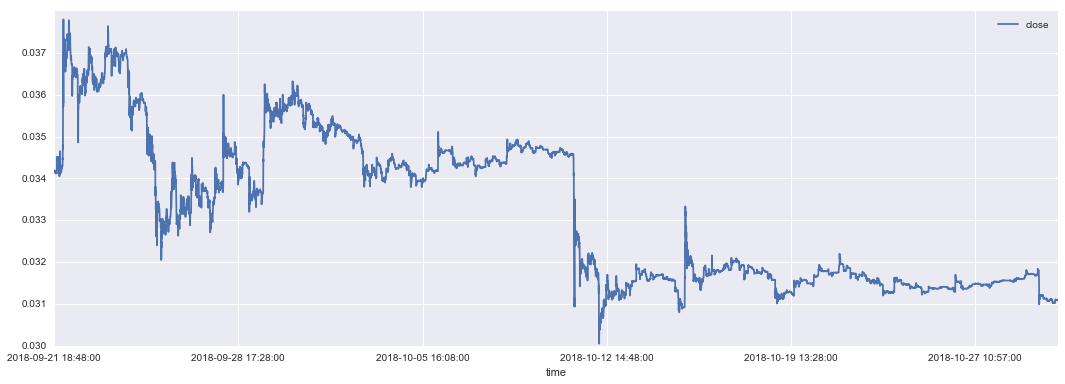

In [31]:
close.plot(figsize=(18, 6))

# 转变数据周期频率

In [127]:
# 作者：BigQuant
# 链接：https://www.zhihu.com/question/61607343/answer/189318262
# 来源：知乎
# 著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

# df=D.history_data(['000001.SZA', '000002.SZA', '600000.SHA'], start_date='2015-01-01', fields=['open', 'high', 'low', 'close', 'volume', 'amount'])
# df.set_index('date', inplace=True)


def resample(df):
    # https://pandas-docs.github.io/pandas-docs-travis/timeseries.html#offset-aliases
    # 周 W、月 M、季度 Q、10天 10D、2周 2W
    period = 'W'

    weekly_df = df.resample(period).last()
    weekly_df['open'] = df['open'].resample(period).first()
    weekly_df['high'] = df['high'].resample(period).max()
    weekly_df['low'] = df['low'].resample(period).min()
    weekly_df['close'] = df['close'].resample(period).last()
    weekly_df['volume'] = df['volume'].resample(period).sum()
#     weekly_df['amount'] = df['amount'].resample(period, how='sum')
    # 去除空的数据（没有交易的周）
#     weekly_df = weekly_df[weekly_df.instrument.notnull()]
#     weekly_df.reset_index(inplace=True)
    return weekly_df

# weekly_df = df.groupby('instrument').apply(resample)
# weekly_df.reset_index(drop=True, inplace=True)
# weekly_df.head()

In [60]:
example_bchz18.head()

,time,open,high,low,close,volume
0,2018-09-21 18:48:00,0.03418,0.03418,0.03418,0.03418,0
1,2018-09-21 18:49:00,0.03418,0.03418,0.03418,0.03418,0
2,2018-09-21 18:50:00,0.03418,0.03418,0.03418,0.03418,0
3,2018-09-21 18:51:00,0.03418,0.03418,0.03418,0.03418,0
4,2018-09-21 18:52:00,0.03418,0.03418,0.03418,0.03418,0


In [61]:
example_bchz18.index = pd.DatetimeIndex(example_bchz18['time'])
del example_bchz18['time']

In [73]:
example_bchz18.head()

,open,high,low,close,volume
2018-09-21 18:48:00,0.03418,0.03418,0.03418,0.03418,0
2018-09-21 18:49:00,0.03418,0.03418,0.03418,0.03418,0
2018-09-21 18:50:00,0.03418,0.03418,0.03418,0.03418,0
2018-09-21 18:51:00,0.03418,0.03418,0.03418,0.03418,0
2018-09-21 18:52:00,0.03418,0.03418,0.03418,0.03418,0


## Now we can covert into weekly data 转变为周频率数据

In [65]:
weekly = resample(example_bchz18)

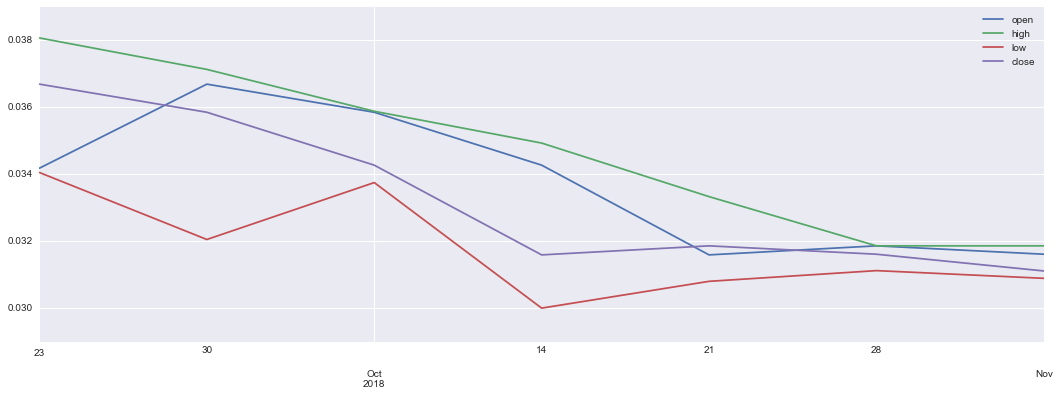

In [68]:
weekly[['open', 'high', 'low', 'close']].plot(figsize = (18, 6))

In [74]:
weekly.head()

,open,high,low,close,volume
2018-09-23,0.03418,0.03807,0.03405,0.03669,15655
2018-09-30,0.03669,0.03713,0.03205,0.03585,89787
2018-10-07,0.03585,0.03588,0.03375,0.03427,94909
2018-10-14,0.03427,0.03493,0.03000,0.03159,148372
2018-10-21,0.03159,0.03333,0.03080,0.03186,103662


In [76]:
weekly['time'] = weekly.index
weekly = weekly[['time', 'open', 'high', 'low', 'close']]

In [81]:
weekly.head(2)

,time,open,high,low,close
2018-09-23,2018-09-23,0.03418,0.03807,0.03405,0.03669
2018-09-30,2018-09-30,0.03669,0.03713,0.03205,0.03585


In [84]:
weekly_ = weekly.copy()

In [85]:
weekly_.reset_index(inplace=True)

In [87]:
weekly_.head(2)
del weekly_['index']

In [88]:
weekly_.head(2)

,time,open,high,low,close
0,2018-09-23,0.03418,0.03807,0.03405,0.03669
1,2018-09-30,0.03669,0.03713,0.03205,0.03585


In [104]:
to_plot = example_bchz18.copy()

In [107]:
to_plot['time'] = to_plot.index

In [110]:
to_plot.head(2)

,open,high,low,close,volume,time
2018-09-21 18:48:00,0.03418,0.03418,0.03418,0.03418,0,2018-09-21 18:48:00
2018-09-21 18:49:00,0.03418,0.03418,0.03418,0.03418,0,2018-09-21 18:49:00


In [111]:
to_plot.reset_index(inplace=True)

In [113]:
del to_plot['index']
to_plot = to_plot[['time', 'open', 'high', 'low', 'close', 'volume']]
to_plot.head(2)

,time,open,high,low,close,volume
0,2018-09-21 18:48:00,0.03418,0.03418,0.03418,0.03418,0
1,2018-09-21 18:49:00,0.03418,0.03418,0.03418,0.03418,0


In [117]:
import mdates

ImportError: No module named 'mdates'

In [118]:
import matplotlib.dates as mdates

In [119]:
to_plot['date'] = mdates.date2num(to_plot.time.dt.to_pydatetime())

In [124]:
to_plot = to_plot.tail(1000)

In [133]:
to_plot['time'].values[1]

numpy.datetime64('2018-10-30T12:31:00.000000000')

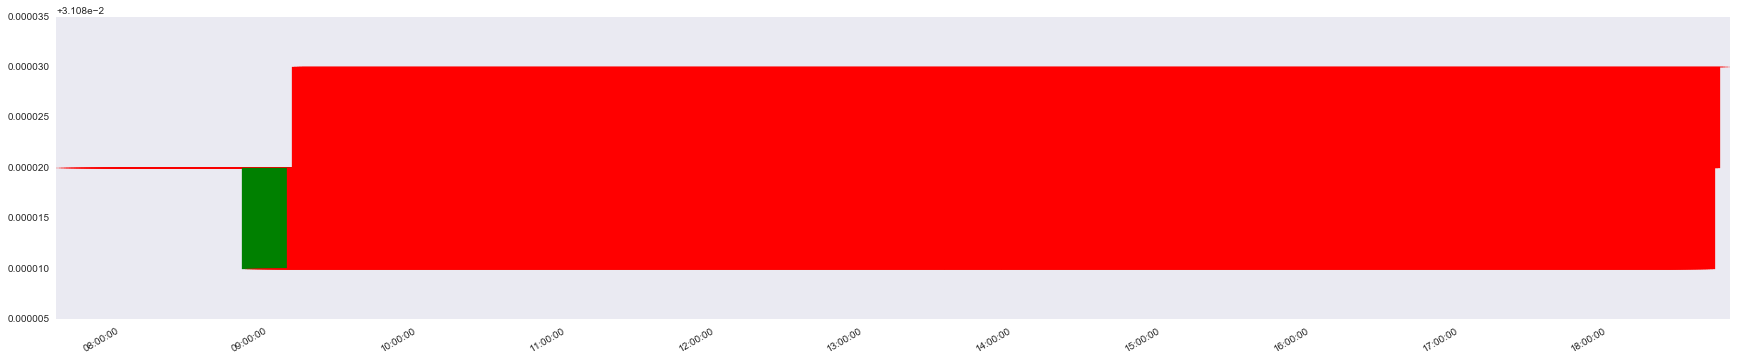

In [125]:
# print(to_plot)

fig,ax = plt.subplots(figsize=(30,6))
fig.subplots_adjust(bottom=0.2)
mpf.candlestick_ohlc(ax, to_plot[['date', 'open', 'high', 'low', 'close']].values, width=0.4, colorup='r', colordown='g')
plt.grid(False)
ax.xaxis_date()
ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=30) 
plt.show()

# 作者：allenmagic
# 链接：https://www.jianshu.com/p/0e846ad44b3d
# 來源：简书
# 简书著作权归作者所有，任何形式的转载都请联系作者获得授权并注明出处。